ValueError: Unknown format code 'd' for object of type 'float'

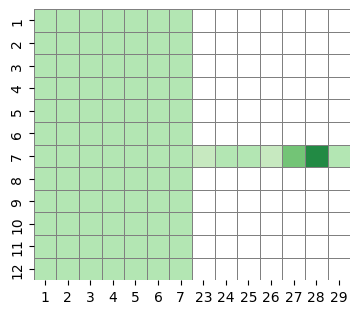

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV file with the correct date format
df = pd.read_csv('gymdata.csv', parse_dates=['Date'], dayfirst=True)

# Step 2: Preprocess the data (same as before)
df.set_index('Date', inplace=True)
date_range = pd.date_range(start=df.index.min(), end=df.index.max())
df = df.reindex(date_range, fill_value=0)

# Step 3: Adjust intensity values based on streak continuity
intensity_values = df['Intensity'].values
current_streak = 0
max_streak = 0

for i in range(len(intensity_values)):
    if intensity_values[i] == 1:
        current_streak += 1
        max_streak = max(max_streak, current_streak)
    else:
        current_streak = 0

    intensity_values[i] = current_streak

# Step 4: Create the Heatmap with square boxes, custom green color scheme, and fill missing values for each month
# Get the number of days in each month
days_in_month = df.resample('M').size().max()

# Create a DataFrame to store the heatmap data
heatmap_data = pd.DataFrame(index=range(1, 13), columns=range(1, days_in_month + 1), data=0)

# Fill the DataFrame with the actual intensity values
for idx, intensity in zip(df.index, intensity_values):
    month, day = idx.month, idx.day
    heatmap_data.at[month, day] = intensity

# Calculate the aspect ratio based on the number of days in a month
aspect_ratio = days_in_month / 12

# Custom green color palette with specified intensity levels
cmap = sns.color_palette([(0.7, 0.9, 0.7)] + sns.color_palette("Greens", max_streak))

# Plot the heatmap with square boxes and adjusted aspect ratio
plt.figure(figsize=(days_in_month * aspect_ratio, 12))  # Adjust width based on the aspect ratio
sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt='d', linewidths=0.5, linecolor='gray', cbar=False,
            square=True)  # Use square boxes
plt.xlabel('Day')
plt.ylabel('Month')
plt.title('Activity Heatmap for a Year (Customized Green Streak)')
plt.show()
